In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters Vector

Load and normalization vector of parameters.

In [2]:
allpatients = pd.read_csv('TimeFreq_Male.csv')
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,-160.911944,228.681119,-73.592480,12.114209,-19.627556,-51.947163,35.624172,9.882168,-14.178359,20.714731,0.191217,0.059903,724.662174,0.889806,-0.896195,1.154653,-0.278985,Zdrowy
1,-197.106440,166.755201,-21.951723,-15.887035,-36.842218,-6.582878,5.057842,14.272520,-14.489270,-5.620738,0.148332,0.053717,417.236554,0.699998,-0.896794,2.979608,0.072243,Zdrowy
2,-204.650770,207.557119,-11.597554,11.815905,-40.266416,-32.428574,39.822402,8.095504,-11.392767,16.523839,0.194731,0.050808,618.072098,0.672834,-0.710505,0.712838,-0.001326,Zdrowy
3,-203.511075,188.906737,-27.676906,25.107307,-40.541275,-16.785163,37.529062,-1.826874,-9.332747,3.472364,0.102334,0.039368,116.005879,0.302423,-0.411391,0.969498,0.309411,Zdrowy
4,-158.058978,163.176761,-29.306014,9.665243,-42.922741,-17.166039,29.415382,11.528499,-15.655205,4.165401,0.129711,0.047785,432.854551,0.423341,-0.586455,1.982088,-0.035419,Zdrowy


Features has diffrent rows, so they have to be normalized.

In [3]:
features = allpatients.drop(labels='Status',axis=1).columns
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,0.728900,2.139424,-2.448289,1.352355,0.660232,-2.267691,2.229700,0.151138,-0.609042,2.078223,0.341019,0.632798,1.221243,2.262988,-1.428772,0.756403,-0.489581,Zdrowy
1,-0.088374,0.112522,-0.474817,-0.282986,-0.382543,0.353846,0.019758,0.493797,-0.632543,-0.138414,-0.445175,0.300716,-0.063878,1.098564,-1.431864,2.558879,0.358007,Zdrowy
2,-0.258726,1.448013,-0.079129,1.334933,-0.589964,-1.139740,2.533232,0.011692,-0.398486,1.725479,0.405441,0.144555,0.775668,0.931921,-0.471140,0.320030,0.180469,Zdrowy
3,-0.232992,0.837566,-0.693607,2.111184,-0.606613,-0.235729,2.367423,-0.762732,-0.242774,0.626946,-1.288456,-0.469644,-1.323103,-1.340451,1.071438,0.573528,0.930342,Zdrowy
4,0.793320,-0.004604,-0.755864,1.209329,-0.750870,-0.257739,1.780805,0.279631,-0.720673,0.685278,-0.786557,-0.017774,0.001409,-0.598652,0.168603,1.573646,0.098196,Zdrowy


Afterwards data have to be suffled, in order to avoid overfitting

In [4]:
allpatients = allpatients.sample(frac=1).reset_index(drop=True)
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,0.548390,0.265712,-0.689472,1.413376,-0.393003,-0.494974,-0.223858,-1.167154,0.560180,-1.710882,0.144440,-0.238871,0.630892,-0.348768,0.038868,-0.526799,-1.090191,Chory
1,-0.440006,1.101089,-0.367574,-0.165434,0.512924,0.488185,-0.844450,-0.479830,0.254671,-0.227751,-0.086200,-0.042144,-0.235670,0.882525,-1.470738,2.807725,-1.631778,Zdrowy
2,0.935033,2.149662,-1.251072,-0.264423,-0.054988,0.060440,-0.663369,-0.192251,1.665517,-0.983151,1.709655,0.195526,0.847680,1.565863,-1.536230,0.905200,-0.089182,Zdrowy
3,0.414043,0.112814,0.185885,-0.137355,0.562459,0.151398,-0.004343,-0.057023,-0.300089,0.956261,0.495200,-0.187092,-0.662015,1.032427,-1.685563,-0.096551,0.327124,Chory
4,0.610655,0.835639,-0.026957,0.161177,1.194965,-0.331824,1.440539,-0.322284,0.123653,1.305899,-0.095195,-0.745474,-0.799303,0.139168,-1.096295,1.233697,-1.437914,Zdrowy


# PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=3)
pca.fit(allpatients.drop(['Status'], axis=1))
X = pca.transform(allpatients.drop(['Status'], axis=1))
X = pd.DataFrame(X, columns=['A','B','C'])
X['Status'] = allpatients['Status']

In [7]:
from mpl_toolkits.mplot3d import Axes3D

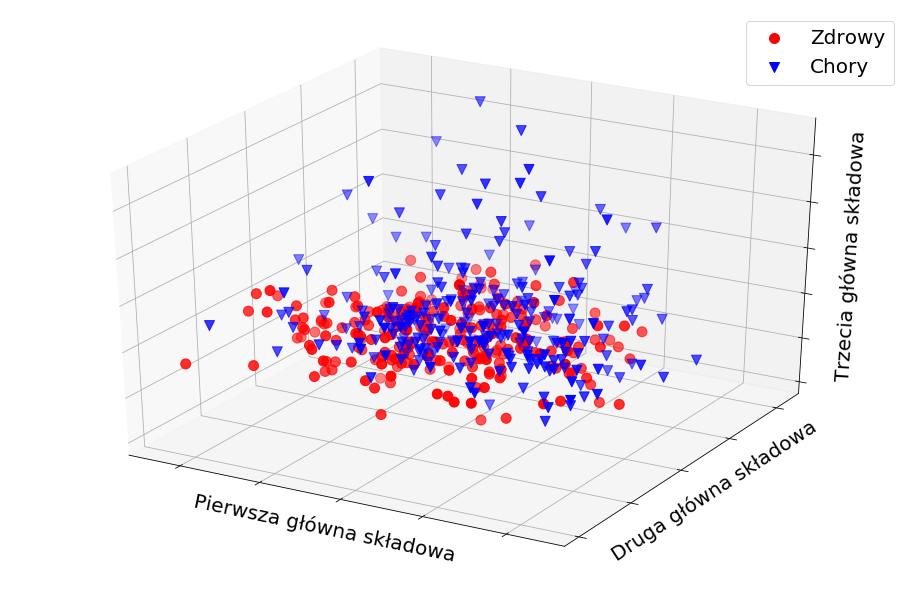

In [8]:
fig = plt.figure()
fig.set_size_inches(16, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[X['Status']=='Zdrowy']['A'],
           X[X['Status']=='Zdrowy']['B'],
           X[X['Status']=='Zdrowy']['C'],
           s=100,
           c='r',
           marker='o',
           label='Zdrowy')
ax.scatter(X[X['Status']=='Chory']['A'],
           X[X['Status']=='Chory']['B'],
           X[X['Status']=='Chory']['C'],
           s=100,
           c='b',
           marker='v',
           label='Chory')
plt.legend(loc='upper right', frameon = True, fontsize=20)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Pierwsza główna składowa', fontsize=20)
ax.set_ylabel('Druga główna składowa', fontsize=20)
ax.set_zlabel('Trzecia główna składowa', fontsize=20)
plt.show()

# Dummy variables
We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [9]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [10]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [11]:
allpatients['Chory'] = status
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Chory
0,0.548390,0.265712,-0.689472,1.413376,-0.393003,-0.494974,-0.223858,-1.167154,0.560180,-1.710882,0.144440,-0.238871,0.630892,-0.348768,0.038868,-0.526799,-1.090191,0
1,-0.440006,1.101089,-0.367574,-0.165434,0.512924,0.488185,-0.844450,-0.479830,0.254671,-0.227751,-0.086200,-0.042144,-0.235670,0.882525,-1.470738,2.807725,-1.631778,1
2,0.935033,2.149662,-1.251072,-0.264423,-0.054988,0.060440,-0.663369,-0.192251,1.665517,-0.983151,1.709655,0.195526,0.847680,1.565863,-1.536230,0.905200,-0.089182,1
3,0.414043,0.112814,0.185885,-0.137355,0.562459,0.151398,-0.004343,-0.057023,-0.300089,0.956261,0.495200,-0.187092,-0.662015,1.032427,-1.685563,-0.096551,0.327124,0
4,0.610655,0.835639,-0.026957,0.161177,1.194965,-0.331824,1.440539,-0.322284,0.123653,1.305899,-0.095195,-0.745474,-0.799303,0.139168,-1.096295,1.233697,-1.437914,1


# Train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(allpatients.drop(['Chory'], axis=1), 
                                                    allpatients['Chory'], 
                                                    test_size=0.25, 
                                                    random_state=42)

### K-fold validation
I dicided to use k-fold validation due to low num of train examples

In [15]:
num_folds = 5

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

# Logistic Regression Algorithm

In [16]:
from sklearn.linear_model import LogisticRegression

In [21]:
results = {}
best_acc = -1
best_model = None
C = [1e-2, 5e-2, 1e-1, 1.2e-1, 2e-1, 4e-1, 5e-1, 5.25e-1, 5.5e-1, 5.75e-1, 6e-1, 1, 2, 3, 4, 5, 6]

for reg in C:
    #reset accuraties for folds
    train_acc = 0 
    val_acc = 0
    
    for i in range(num_folds):
        logModel = LogisticRegression(penalty='l1', C=reg, solver='liblinear')
        
        train_set = np.concatenate(X_train_folds[:i]+X_train_folds[i+1:])
        labels_set = np.concatenate(y_train_folds[:i]+y_train_folds[i+1:])
        
        logModel.fit(train_set, labels_set)
        #sum acc for each fold
        y_train_pred = logModel.predict(train_set)
        train_acc += np.mean(y_train_pred == labels_set) 
        
        y_val_pred = logModel.predict(X_train_folds[i])
        val_acc += np.mean(y_val_pred == y_train_folds[i])
        
    #compute mean for accuraties
    train_acc /= num_folds
    val_acc /= num_folds
    results[reg] = (train_acc, val_acc)
    if val_acc > best_acc:
            best_acc = val_acc
            best_model = logModel
            
# Print out results.
for C in sorted(results):
    train_accuracy, val_accuracy = results[C]
    print('C %e train accuracy: %f val accuracy: %f' % (
                C, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_acc)

C 1.000000e-02 train accuracy: 0.500012 val accuracy: 0.500200
C 5.000000e-02 train accuracy: 0.680409 val accuracy: 0.651981
C 1.000000e-01 train accuracy: 0.702303 val accuracy: 0.662338
C 1.200000e-01 train accuracy: 0.699728 val accuracy: 0.662404
C 2.000000e-01 train accuracy: 0.708107 val accuracy: 0.662404
C 4.000000e-01 train accuracy: 0.703595 val accuracy: 0.670063
C 5.000000e-01 train accuracy: 0.704892 val accuracy: 0.659740
C 5.250000e-01 train accuracy: 0.703603 val accuracy: 0.659740
C 5.500000e-01 train accuracy: 0.704892 val accuracy: 0.659740
C 5.750000e-01 train accuracy: 0.705537 val accuracy: 0.659774
C 6.000000e-01 train accuracy: 0.704249 val accuracy: 0.657209
C 1.000000e+00 train accuracy: 0.710688 val accuracy: 0.652048
C 2.000000e+00 train accuracy: 0.710053 val accuracy: 0.646886
C 3.000000e+00 train accuracy: 0.709408 val accuracy: 0.649484
C 4.000000e+00 train accuracy: 0.710051 val accuracy: 0.649484
C 5.000000e+00 train accuracy: 0.710694 val accuracy: 0

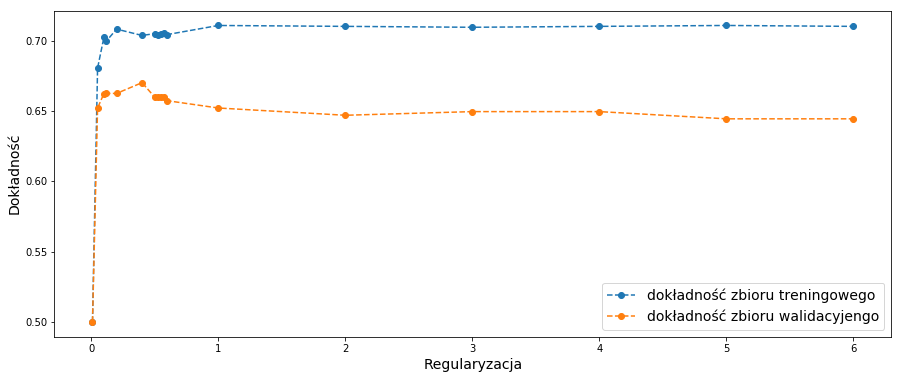

In [22]:
train = []
val = [] 
c = []
for C in sorted(results):
    train_accuracy, val_accuracy = results[C]
    train.append(train_accuracy)
    val.append(val_accuracy)
    c.append(C)
    
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.plot(c,train, 'o--', label='dokładność zbioru treningowego')
plt.plot(c,val, 'o--',label='dokładność zbioru walidacyjengo')
ax.set_xlabel('Regularyzacja', fontsize=14)
ax.set_ylabel('Dokładność', fontsize=14)
plt.legend(loc='lower right', frameon = True, fontsize=14)

In [26]:
prediction = best_model.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.77      0.62      0.68        65
           1       0.68      0.82      0.74        65

   micro avg       0.72      0.72      0.72       130
   macro avg       0.72      0.72      0.71       130
weighted avg       0.72      0.72      0.71       130



In [20]:
print(confusion_matrix(y_test,prediction))

[[27 24]
 [12 41]]


# Random Forest Algorithm

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
results = {}
best_acc = -1
best_model = None
n_estimators = [10,20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 130 , 140, 150, 200,250, 300, 400, 500]#, 550, 600]

for n in n_estimators:
    #reset accuraties for folds
    val_acc = 0
    
    for i in range(num_folds):
        rf_model = RandomForestClassifier(n_estimators=n)
        
        train_set = np.concatenate(X_train_folds[:i]+X_train_folds[i+1:])
        labels_set = np.concatenate(y_train_folds[:i]+y_train_folds[i+1:])
        
        rf_model.fit(train_set, labels_set) 
        
        y_val_pred = rf_model.predict(X_train_folds[i])
        val_acc += np.mean(y_val_pred == y_train_folds[i])
        
    #compute mean for accuraties
    val_acc /= num_folds
    results[n] = val_acc
    if val_acc > best_acc:
            best_acc = val_acc
            best_model = rf_model

# Print out results.
for n in sorted(results):
    val_accuracy = results[n]
    print('n_estimators %e val accuracy: %f' % (n, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_acc)

n_estimators 1.000000e+01 val accuracy: 0.670063
n_estimators 2.000000e+01 val accuracy: 0.652115
n_estimators 3.000000e+01 val accuracy: 0.670230
n_estimators 4.000000e+01 val accuracy: 0.680386
n_estimators 5.000000e+01 val accuracy: 0.706161
n_estimators 6.000000e+01 val accuracy: 0.675125
n_estimators 7.000000e+01 val accuracy: 0.680386
n_estimators 8.000000e+01 val accuracy: 0.677855
n_estimators 9.000000e+01 val accuracy: 0.706161
n_estimators 1.000000e+02 val accuracy: 0.675225
n_estimators 1.200000e+02 val accuracy: 0.670063
n_estimators 1.300000e+02 val accuracy: 0.685648
n_estimators 1.400000e+02 val accuracy: 0.680553
n_estimators 1.500000e+02 val accuracy: 0.685714
n_estimators 2.000000e+02 val accuracy: 0.675291
n_estimators 2.500000e+02 val accuracy: 0.693473
n_estimators 3.000000e+02 val accuracy: 0.680553
n_estimators 4.000000e+02 val accuracy: 0.690776
n_estimators 5.000000e+02 val accuracy: 0.685581
best validation accuracy achieved during cross-validation: 0.706161


Text(0,0.5,'dokładność zbioru walidacyjnego')

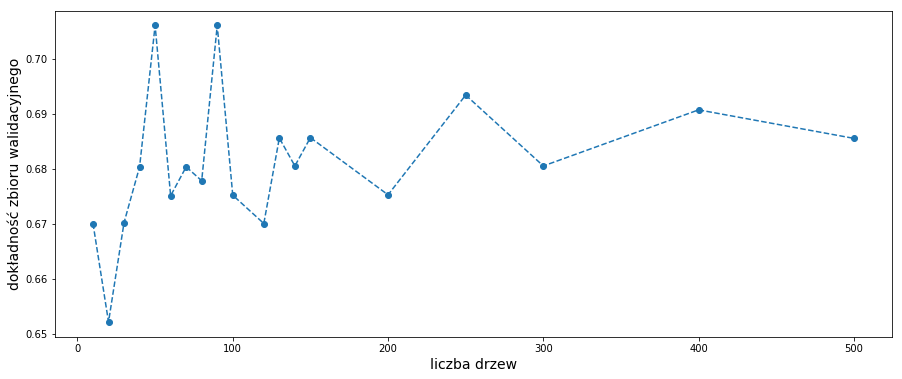

In [39]:
val = [] 
n_estimators = []
for n in sorted(results):
    val_accuracy = results[n]
    val.append(val_accuracy)
    n_estimators.append(n)
    
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.plot(n_estimators, val, 'o--')
ax.set_xlabel('liczba drzew', fontsize=14)
ax.set_ylabel('dokładność zbioru walidacyjnego', fontsize=14)

In [40]:
prediction = best_model.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [41]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67        65
           1       0.67      0.69      0.68        65

   micro avg       0.68      0.68      0.68       130
   macro avg       0.68      0.68      0.68       130
weighted avg       0.68      0.68      0.68       130



In [74]:
print(confusion_matrix(y_test,prediction))

[[32 19]
 [10 43]]


In [75]:
feature_importance = clf.feature_importances_

[Text(0,0,'MFCC1'),
 Text(0,0,'MFCC2'),
 Text(0,0,'MFCC3'),
 Text(0,0,'MCCC4'),
 Text(0,0,'MFCC5'),
 Text(0,0,'MFCC6'),
 Text(0,0,'MFCC7'),
 Text(0,0,'MFCC8'),
 Text(0,0,'MFCC9'),
 Text(0,0,'MFCC10'),
 Text(0,0,'RMS'),
 Text(0,0,'ZCR'),
 Text(0,0,'F0'),
 Text(0,0,'Maks'),
 Text(0,0,'Min'),
 Text(0,0,'Kurt'),
 Text(0,0,'Skos')]

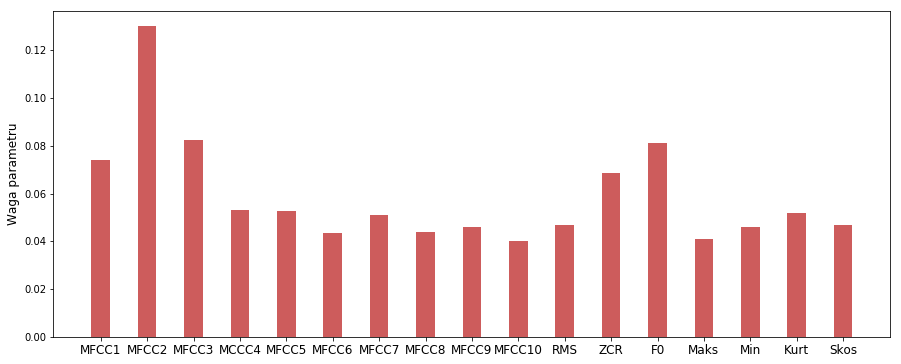

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.grid(b=False)
ind = np.arange(len(feature_importance))  # the x locations for the groups
width = 0.4  # the width of the bars
ax.bar(ind, feature_importance, width, color='IndianRed')
ax.set_ylabel('Waga parametru', fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(['MFCC1', 'MFCC2', 'MFCC3', 'MCCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
                    'MFCC9', 'MFCC10', 'RMS', 'ZCR', 'F0', 'Maks', 'Min', 'Kurt', 'Skos'], fontsize=12)

In [78]:
allpatients.columns

Index(['MFCC1', 'MFCC2', 'MFCC3', 'MCCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'RMS', 'ZCR', 'F0', 'MAX', 'MIN', 'KURTOSIS',
       'SKEWNESS', 'Chory'],
      dtype='object')